In [17]:
%pylab inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [18]:
print u'\u1433\u1438'
aᐳᐸb = 0

SyntaxError: invalid syntax (<ipython-input-18-90694c699498>, line 2)

In [19]:
import pandas as pd

In [20]:
frm = pd.DataFrame.from_csv('/Users/alehmann/Documents/Documents/HIH/phd_application/GPS Eksperiment/2016-03-23_23-07-20.csv')
frm2 = pd.DataFrame.from_csv('/Users/alehmann/Documents/Documents/HIH/phd_application/GPS Eksperiment/2016-03-26_17-46-56.csv')

In [21]:
frm.columns

Index([u'loggingSample', u'identifierForVendor', u'deviceID',
       u'locationTimestamp_since1970', u'locationLatitude',
       u'locationLongitude', u'locationAltitude', u'locationSpeed',
       u'locationCourse', u'locationVerticalAccuracy',
       u'locationHorizontalAccuracy', u'locationFloor',
       u'motionTimestamp_sinceReboot', u'motionYaw', u'motionRoll',
       u'motionPitch', u'motionRotationRateX', u'motionRotationRateY',
       u'motionRotationRateZ', u'motionUserAccelerationX',
       u'motionUserAccelerationY', u'motionUserAccelerationZ',
       u'motionAttitudeReferenceFrame', u'motionQuaternionX',
       u'motionQuaternionY', u'motionQuaternionZ', u'motionQuaternionW',
       u'motionGravityX', u'motionGravityY', u'motionGravityZ',
       u'motionMagneticFieldX', u'motionMagneticFieldY',
       u'motionMagneticFieldZ', u'motionMagneticFieldCalibrationAccuracy'],
      dtype='object')

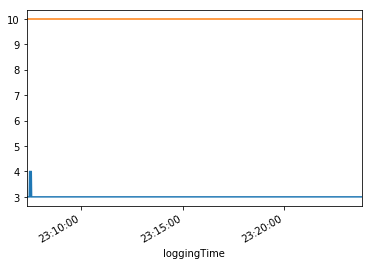

In [22]:
frm[u'locationVerticalAccuracy'][:150].plot()
frm[u'locationHorizontalAccuracy'][:150].plot()

In [23]:
folder ='/Users/alehmann/Documents/Documents/HIH/phd_application/GPS Eksperiment/'
import os
data = []
for f in os.listdir(folder):
    if f.startswith('.'):
        continue
    frm2 =  pd.DataFrame.from_csv(folder+f)
    data.append((f,frm2))


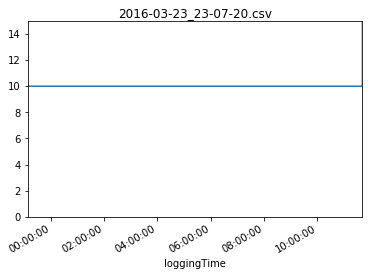

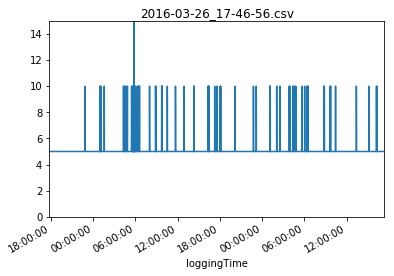

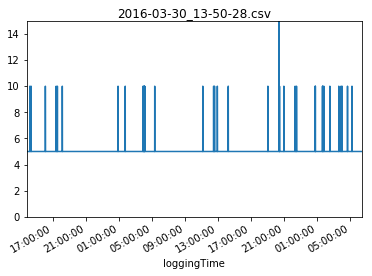

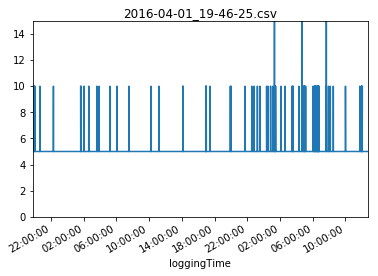

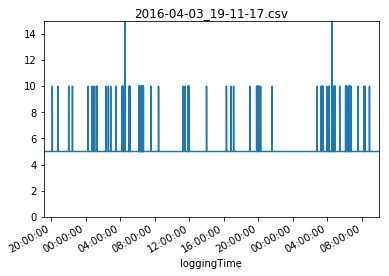

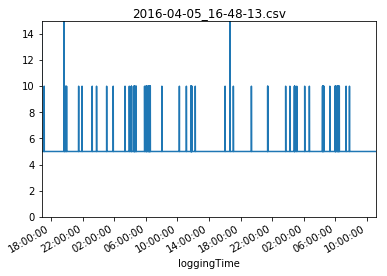

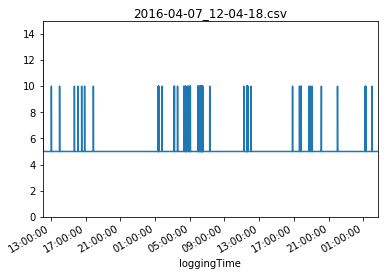

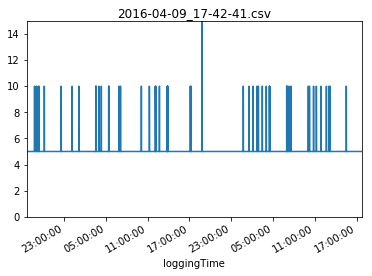

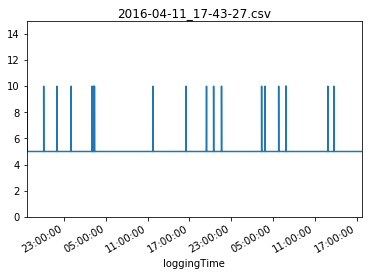

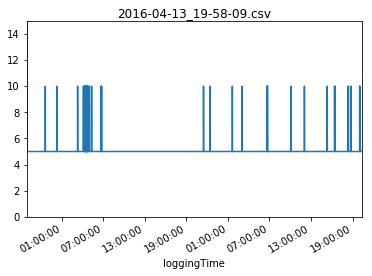

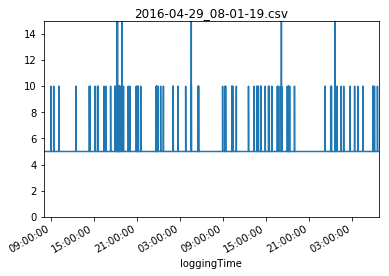

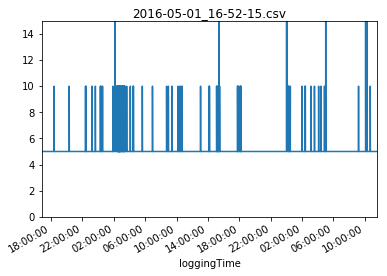

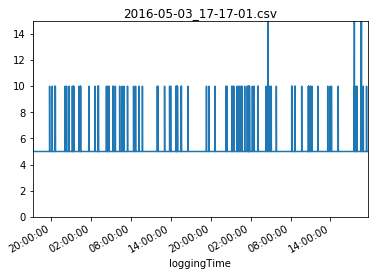

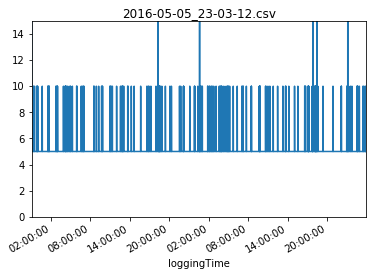

In [24]:
for f,frm2 in data:
    title(f)
    #frm2[u'locationVerticalAccuracy'].dropna().plot(ylim=(0,30))
    frm2[u'locationHorizontalAccuracy'].dropna().plot(ylim=(0,15))
    
    figure()

0
2016-03-23_23-07-20.csv (10697, 34) 0 nan
11
loggingTime
2016-03-27 04:26:38.808    0.145445
2016-03-27 04:26:39.897    0.178973
2016-03-27 05:39:07.449    0.203687
2016-03-27 05:39:55.752    0.145850
2016-03-27 05:48:45.117    0.213406
2016-03-28 05:06:05.425    0.174746
2016-03-28 05:06:12.036    0.203758
2016-03-28 05:06:19.676    0.193904
2016-03-28 05:06:51.514    0.155217
2016-03-28 05:06:57.045    0.145485
2016-03-28 05:07:29.958    0.232902
Name: locationSpeed, dtype: float64
2016-03-26_17-46-56.csv (104038, 12) 11 0.83844612
5
loggingTime
2016-03-30 13:50:29.279    0.220627
2016-03-30 13:50:30.419    0.181223
2016-03-30 13:51:10.909    0.164921
2016-03-30 13:51:11.996    0.198946
2016-03-30 13:51:14.239    0.188917
Name: locationSpeed, dtype: float64
2016-03-30_13-50-28.csv (91415, 12) 16 0.79425828
5
loggingTime
2016-04-02 02:07:16.865    0.397796
2016-04-02 02:07:17.960    0.555226
2016-04-02 02:07:44.323    0.407553
2016-04-03 02:05:23.768    0.184380
2016-04-03 02:05:42.

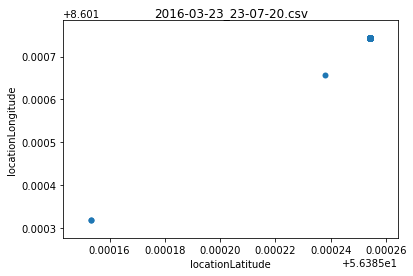

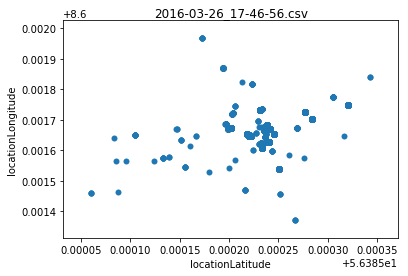

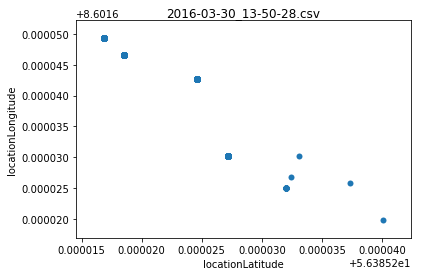

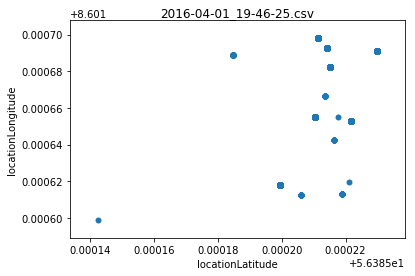

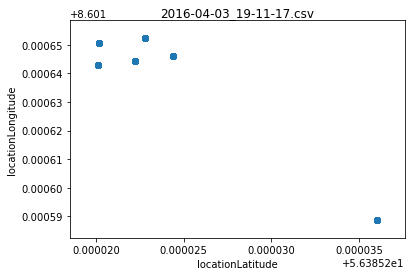

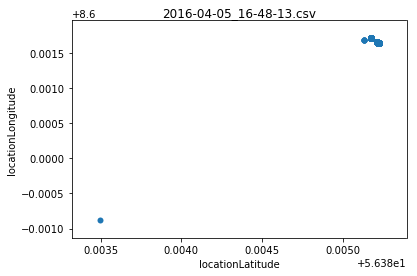

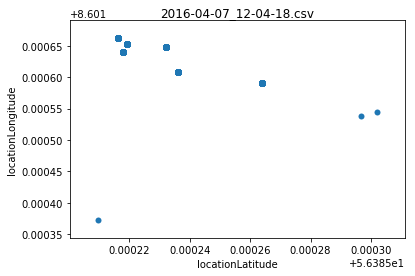

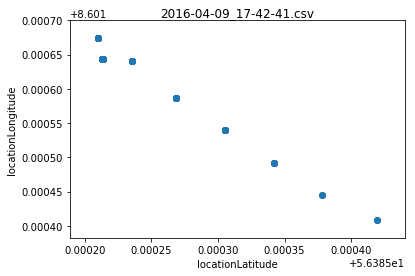

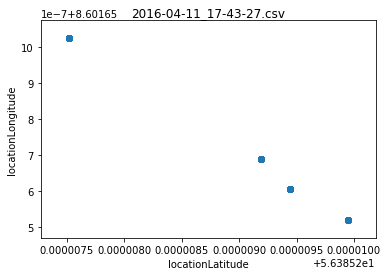

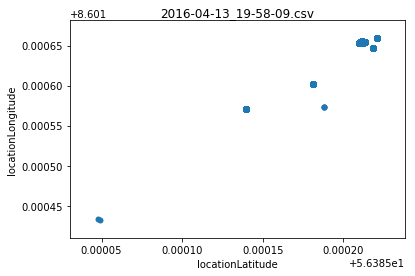

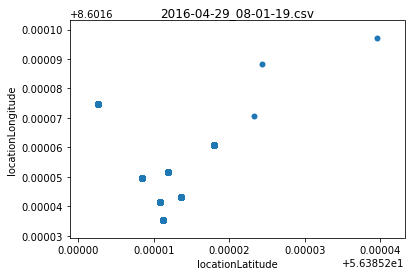

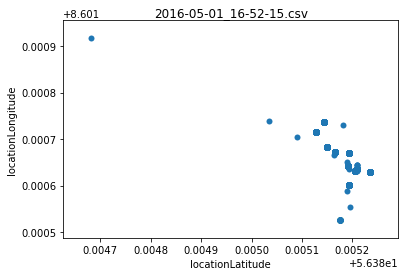

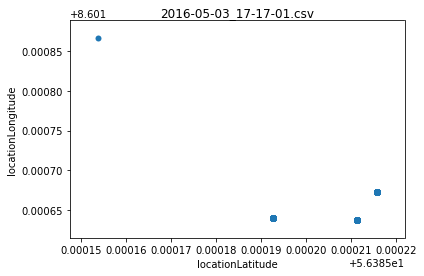

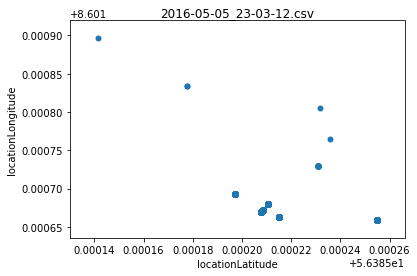

In [25]:
pos_speed = 0
for f,frm in data:

    frm = frm.dropna()
    speedy = frm['locationSpeed'][frm['locationSpeed']>0]
    length = len(speedy)
    print length
    if length:
        pos_speed += (speedy).shape[0]
        print speedy
    print f,frm.shape, pos_speed,speedy.max()*3.6

    la_mx = frm['locationLatitude'].max()
    la_mn = frm['locationLatitude'].min()
    lo_mx = frm['locationLongitude'].max()
    lo_mn = frm['locationLongitude'].min()
    lo_spc = (lo_mx-lo_mn)/10
    y_lim =(lo_mn-lo_spc,lo_mx+lo_spc)
    la_spc = (la_mx-la_mn)/10
    x_lim =(la_mn-la_spc,la_mx+la_spc)
    frm.plot(x='locationLatitude',y='locationLongitude',kind='scatter',ylim=y_lim,xlim=x_lim)
    title(f)
    #figure()

In [26]:
frm['locationSpeed'][frm['locationSpeed']>0]

Series([], Name: locationSpeed, dtype: float64)

In [27]:
lat = []
for f,frm in data :
    print f
    if f == u'2016-04-05_16-48-13.csv':
        print "hello"
    pos = frm[['locationLatitude','locationLongitude','locationSpeed']]
    lat.append(pos.dropna())
    

2016-03-23_23-07-20.csv
2016-03-26_17-46-56.csv
2016-03-30_13-50-28.csv
2016-04-01_19-46-25.csv
2016-04-03_19-11-17.csv
2016-04-05_16-48-13.csv
hello
2016-04-07_12-04-18.csv
2016-04-09_17-42-41.csv
2016-04-11_17-43-27.csv
2016-04-13_19-58-09.csv
2016-04-29_08-01-19.csv
2016-05-01_16-52-15.csv
2016-05-03_17-17-01.csv
2016-05-05_23-03-12.csv


In [28]:
from math import atan2
def rad(angle):
    return angle/180*pi

def haversine(*args):
	# a = sin²(Δφ/2) + cos(φ1).cos(φ2).sin²(Δλ/2)
    # c = 2.atan2(√a, √(1−a))
    # d = R.c
    # d er i kilometer?
    R = 6371 #km
    
    lat, lon, lat1, lon1 = map(rad, args)
    dlat = lat1 - lat
    dlon = lon1 - lon
    a = sin(dlat/2)**2 + cos(lat)*cos(lat1)*sin(dlon/2)**2
    c = 2*atan2(sqrt(a),sqrt(1-a))
    d = R*c
    return d

In [29]:
pos[1:]['locationLongitude']

loggingTime
2016-05-05 23:03:14.019         NaN
2016-05-05 23:03:15.185         NaN
2016-05-05 23:03:16.134         NaN
2016-05-05 23:03:17.221         NaN
2016-05-05 23:03:18.325         NaN
2016-05-05 23:03:19.433         NaN
2016-05-05 23:03:20.515         NaN
2016-05-05 23:03:21.621         NaN
2016-05-05 23:03:22.759         NaN
2016-05-05 23:03:23.805         NaN
2016-05-05 23:03:24.902         NaN
2016-05-05 23:03:26.031         NaN
2016-05-05 23:03:27.096         NaN
2016-05-05 23:03:28.192         NaN
2016-05-05 23:03:29.331         NaN
2016-05-05 23:03:30.384         NaN
2016-05-05 23:03:31.484         NaN
2016-05-05 23:03:32.630         NaN
2016-05-05 23:03:33.682         NaN
2016-05-05 23:03:34.783         NaN
2016-05-05 23:03:35.935         NaN
2016-05-05 23:03:36.983         NaN
2016-05-05 23:03:38.082         NaN
2016-05-05 23:03:39.235         NaN
2016-05-05 23:03:40.301    8.601806
2016-05-05 23:03:41.373         NaN
2016-05-05 23:03:42.471    8.601765
2016-05-05 23:03

In [30]:

for pos in lat:
    tmp = map(haversine,pos[1:]['locationLatitude'],\
                      pos[1:]['locationLongitude'],pos[:-1]['locationLatitude'],pos[:-1]['locationLongitude'])
    pos['deltaX'] = tmp + [0]
    pos['deltaX'] = 1000*pos['deltaX']

In [31]:
for l in lat:
    print l['deltaX'].describe()
    print l['locationSpeed'][l['deltaX']==l['deltaX'].max()]


count    10697.000000
mean         0.002655
std          0.227223
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         22.833726
Name: deltaX, dtype: float64
loggingTime
2016-03-24 11:41:35.659   -1
Name: locationSpeed, dtype: int64
count    104038.000000
mean          0.003921
std           0.220404
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.785297
Name: deltaX, dtype: float64
loggingTime
2016-03-27 05:46:31.153    0
Name: locationSpeed, dtype: float64
count    91415.000000
mean         0.000061
std          0.007968
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.642186
Name: deltaX, dtype: float64
loggingTime
2016-03-31 00:37:56.391    0
Name: locationSpeed, dtype: float64
count    92293.000000
mean         0.000307
std          0.033841
min          0.000000
25%          0.000000
50%          0.000000
75%          0.0

In [32]:
l['deltaX'].max()

13.24134267897472

In [33]:
for pos1 in lat:
    for pos2 in lat:
        print haversine(pos1[0],pos1[1],pos2[0],pos2[1])*1000,
    print

KeyError: 0

In [34]:

df = pd.DataFrame()
for d in data:
    df = df.append(d[1][1:])
    


In [64]:
frm = df#.dropna()
print frm.size
frm = frm[frm['locationHorizontalAccuracy']<200]#.truncate(before='24/04/2016')

65312164


In [53]:
import mplleaflet

In [74]:
fff = frm[frm['locationHorizontalAccuracy']<50].truncate(after='24/04/2016')

(8.601254196199843, 8.6020313669663224) (56.385011840061253, 56.385456233985352)


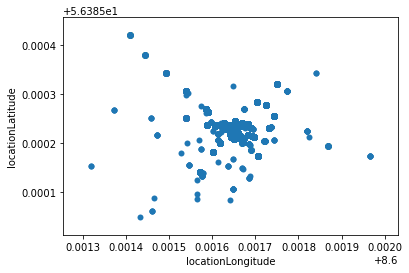

In [72]:


la_mx = fff['locationLatitude'].max()
la_mn = fff['locationLatitude'].min()
lo_mx = fff['locationLongitude'].max()
lo_mn = fff['locationLongitude'].min()
lo_spc = (lo_mx-lo_mn)/10
y_lim =(lo_mn-lo_spc,lo_mx+lo_spc)
la_spc = (la_mx-la_mn)/10
x_lim =(la_mn-la_spc,la_mx+la_spc)

print y_lim,x_lim
fff.plot(x='locationLongitude',y='locationLatitude',kind='scatter',ylim=x_lim,xlim=y_lim)
#plot(x=aa206[1],y=aa206[0],kind='scatter',ylim=x_lim,xlim=y_lim)
#savefig('test.png')
#mplleaflet.show()

56.3852148465 56.3852140122


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


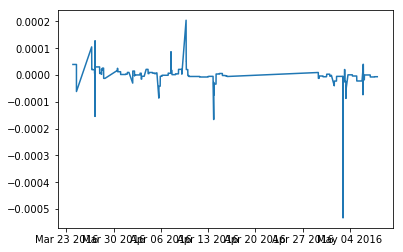

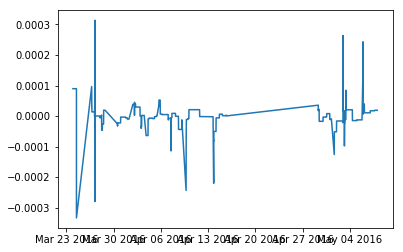

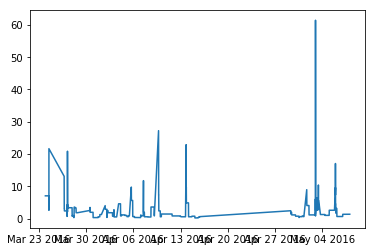

In [75]:
print frm['locationLatitude'].mean(), frm['locationLatitude'].median()
aa206 = frm['locationLatitude'].mean(),frm['locationLongitude'].mean()
aa206_diff_lat = frm['locationLatitude']-aa206[0]
aa206_diff_long = frm['locationLongitude']-aa206[1]
frm['diff'] = map( lambda x,y:1000*haversine(aa206[0],aa206[1],x,y), frm['locationLatitude'],frm['locationLongitude'])
plot(aa206_diff_lat)
figure()
plot(aa206_diff_long)
figure()
plot(frm['diff'])

In [50]:
time2num(idx,12)

AttributeError: 'numpy.ndarray' object has no attribute 'hour'

In [83]:
def format_date(x, pos=None):
     return dates.num2date(x).strftime('%Y-%m-%d') #use FuncFormatter to format dates
def format_time(x,pos=None):
    return int(1.*x/10**9/3600)
aa206_diff = frm['diff'][frm['diff']>5]
idx = array(aa206_diff.index.map(lambda x: x.time()))
idx_date = array(aa206_diff.index.map(lambda x: x.date()))
idx_ = map(time12num,idx)
idx_date_ = map(dates.date2num,idx_date)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
#poly = PolyCollection(res)
#ax.view_init(elev=None,azim=7)
ax.plot(idx_date_,idx_,aa206_diff,'.')
ax.locator_params(axis='x',tight=True,bins=4)
#ax.w_xaxis.set_ticks([0,0.25,0.5,0.75,1])
ax.w_xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.w_yaxis.set_major_formatter(ticker.FuncFormatter(format_time))

NameError: name 'dates' is not defined

In [58]:
print time2num(datetime.datetime.now().time())
time12num(datetime.datetime.now().time())

59526000605242


16326000605874

In [125]:
def time2num(dt,face=24):
    return (((dt.hour%face)*60+dt.minute)*60+dt.second)*10**6+dt.microsecond
def time12num(dt,face=12):
    return time2num(dt,face)
#idx_ = map(time2num,idx)
#idx_date_ = map(dates.date2num,idx_date)

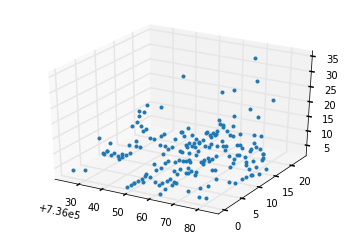

In [59]:
rain_pth = '/Users/alehmann/Documents/Documents/HIH/phd_application/papers/GPS_paper/regndata.csv'
rain_data = []
with open(rain_pth,'r') as f:
    for line in f:
        dta = line.split()
        if int(dta[-7]) > 0:
            rain_data.append((datetime.datetime(int(dta[-1][:4]),int(dta[-1][4:6]),int(dta[-1][6:8])),dta[-1][-2:],dta[-7]))

idx_date_ = map(lambda x: dates.date2num(x[0]),rain_data)
idx_ = map(lambda x: int(x[1]),rain_data)
data = map(lambda x:int(x[-1]),rain_data)

fig = plt.figure()
ax = fig.gca(projection='3d')
#poly = PolyCollection(res)
#ax.view_init(elev=None,azim=7)
ax.plot(idx_date_,idx_,data,'.')
ax.locator_params(axis='x',tight=True,bins=4)

In [151]:
dato = datetime.datetime(int('2016'),int('03'),int('24'))
ddd = dato.date()
print datetime.datetime.utcfromtimestamp(1392182128) #335
print datetime.datetime.utcfromtimestamp(1392210546)#695)

2014-02-12 05:15:28
2014-02-12 13:09:06


54.1010448486
897179
Axes(0.125,0.2;0.775x0.7)


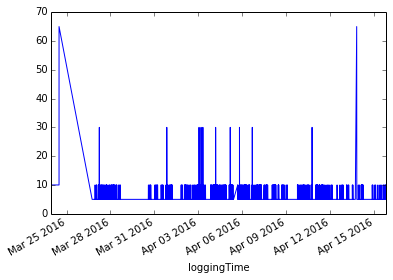

In [76]:
print haversine(la_mn,lo_mn,la_mx,lo_mx)*1000
print frm['locationLatitude'].size
print frm[frm['locationHorizontalAccuracy']>4]['locationHorizontalAccuracy'].plot()

In [81]:
dates_ = np.unique(idx_date.ravel())
day = datetime.timedelta(1)
res=[]
for date in dates_:
    dat = hzA.truncate(before=date,after=date+day)
    ix = array(dat.index.map(lambda x:x.time()))
    pls = array([ix,dat])
    res.append(pls)

In [126]:
hzA_ = df['locationHorizontalAccuracy']
print hzA_.size
hzA = hzA_.dropna()
hzA = hzA.truncate(before='24/04/2016')
print hzA.size
hzA = hzA[hzA>10]
idx = array(hzA.index.map(lambda x: x.time()))
idx_date = array(hzA.index.map(lambda x: x.date()))
idx_ = map(time12num,idx)
idx_24 = map(time2num,idx)
idx_date_ = map(dates.date2num,idx_date)

#hzA.index = idx
hzA.size

1920946
429963


330

In [84]:
import matplotlib.dates as dates


In [128]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
import matplotlib.ticker as ticker
def format_date(x, pos=None):
     return dates.num2date(x).strftime('%Y-%m-%d') #use FuncFormatter to format dates
def format_time(x,pos=None):
    return int(1.*x/10**6/3600)


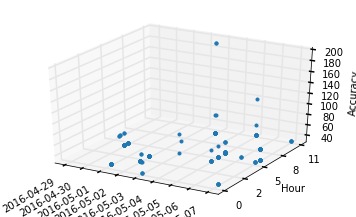

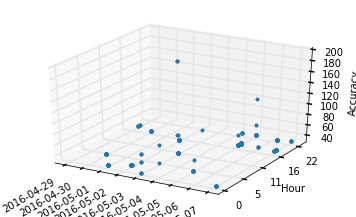

In [129]:

fig = plt.figure()
ax = fig.gca(projection='3d')
#poly = PolyCollection(res)
#ax.view_init(elev=None,azim=7)

#ax.locator_params(axis='x',bins=4)
#ax.w_xaxis.set_ticks([0.,0.25,0.5,0.75])
fig.autofmt_xdate()

#ax.set_xlabel('Date',linespacing=-20.0)
ax.set_ylabel('Hour')
ax.yaxis._axinfo['label']['space_factor'] = 20.8
ax.set_zlabel('Accuracy')
ax.w_xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.w_yaxis.set_major_formatter(ticker.FuncFormatter(format_time))

ax.plot(idx_date_,idx_,hzA,'.')
savefig('3dscatter_12h.eps')

fig = plt.figure()
ax = fig.gca(projection='3d')
#poly = PolyCollection(res)
#ax.view_init(elev=None,azim=7)

ax.plot(idx_date_,idx_24,hzA,'.')

#ax.locator_params(axis='x',bins=4)
#ax.w_xaxis.set_ticks([0.,0.25,0.5,0.75])
fig.autofmt_xdate()
#ax.set_xlabel('Date')
ax.set_ylabel('Hour')
ax.set_zlabel('Accuracy')
ax.w_xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.w_yaxis.set_major_formatter(ticker.FuncFormatter(format_time))
savefig('3dscatter_24h.eps')

In [135]:
print hzA[hzA==max(hzA)]

loggingTime
2016-05-03 10:05:51.299    200
2016-05-03 10:05:52.148    200
Name: locationHorizontalAccuracy, dtype: float64


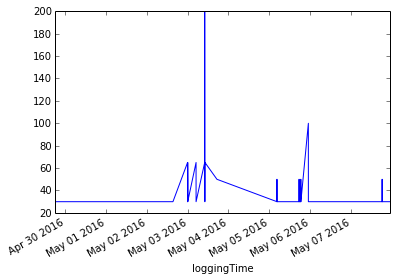

In [27]:
fig = figure()
plta = hzA.plot()
fig.autofmt_xdate()

In [29]:
import json
from bson import json_util

In [ ]:
res = []
with open('/Users/alehmann/Downloads/data2000.json') as fp:
    s = ''
    obj = 0
    for line in fp:
        if "_id" in line : continue
        s+=line
        if '{' in line : obj +=1
        if '}' in line : obj -=1            
        if obj == 0 : 
           # print s
            j = json.loads(s,object_hook=json_util.object_hook)
            res.append(j)
            s = ''
            
len(res)    

In [ ]:
res[0]

In [ ]:
large_err = []
accuracy = []
count = 0
for r in res:
    for loc in r['gpsLocations'][3:]:
        count += 1
        if (loc['accuracy']>60 and loc['accuracy']<70 and
            loc['longitude']> 8.8 and loc['longitude']<9.3 and
            loc['latitude']>56. and loc['latitude']<56.16):
            large_err.append(loc) 
        if (loc['accuracy']>14000):accuracy.append(loc['accuracy'])
print count,len(large_err),len(accuracy),mean(accuracy),min(accuracy),max(accuracy)

In [ ]:
large_err_s = set([(x['latitude'],x['longitude']) for x in large_err])
with open('/Users/alehmann/Documents/large_errors.kml','w') as f:
    
    
    f.write("<?xml version='1.0' encoding='UTF-8'?>\n")
    f.write("<kml xmlns='http://earth.google.com/kml/2.1'>\n")
    f.write("<Document>\n")
    f.write("   <name>" + 'large_errors' + '.kml' +"</name>\n")
    for la,lo in large_err_s:
        f.write("   <Placemark>\n")
        f.write("       <name>" + '' + "</name>\n")
        f.write("       <description>" + ' ' + "</description>\n")
        f.write("       <Point>\n")
        f.write("           <coordinates>" + str(lo) + "," + str(la) + "," + '0' + "</coordinates>\n")
        f.write("       </Point>\n")
        f.write("   </Placemark>\n")
    f.write("</Document>\n")
    f.write("</kml>\n")

In [ ]:
mean(accuracy)
rng = [0,6,10,20,30,40,50,60,70,80,100,120,140,160,200,300,500,1000,2000,3000,4000,5000,10000]
rng2 = [0]+[log(x) for x in rng[1:]]
y,r = histogram(accuracy,rng)

fig, ax = plt.subplots()
ll = ax.hist(accuracy,bins=range(0,210,10),log=False)
title('Frequency of reported uncertainty')
ax.xaxis.set_label_text("meters")


In [30]:
with open('/Users/alehmann/Downloads/result_HCYRE001_hist.json') as f:
    hist_acc = json.load(f)
hist = {}
for doc in hist_acc['results']:
    hist[10*int(doc['_id'])] = doc['value']


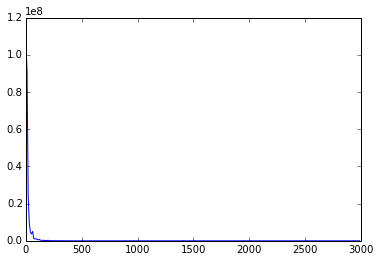

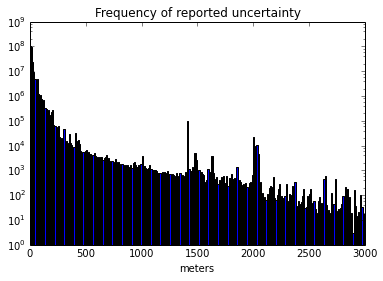

In [75]:
hist_list = hist.items()
hist_list.sort()
hist_arr = array(hist_list)
n,N = 0,300
plot(hist_arr[n:N,0],hist_arr[n:N,1])
fig, ax = plt.subplots()
ll = ax.bar(hist_arr[n:N,0],hist_arr[n:N,1],width=10,log=True)
title('Frequency of reported uncertainty')
ax.xaxis.set_label_text("meters")



In [ ]:
fig = figure(tools=TOOLS, width=350, height=350, title=None)
fig.line('locationHorizontalAccuracy',source=ColumnDataSource(df))

In [ ]:
show(fig)

In [ ]:
import os

In [ ]:
pth = '/Users/alehmann/Documents/Documents/HIH/phd_application/OSPMexperiment/'
fres = []
for fil in os.listdir(pth):
    with open(pth+fil) as f:
        for line in f:
            if 'Street Modelled' in line:
                print fil,line.split(';')[1]
                fres.append((int(fil.split('-')[1].split('k')[0]),line.split(';')[1]))
                break
fres.sort()
print fres


In [ ]:
fig,ax = subplots()
fres = fres[1:]
plot([x[0] for x in fres],[float(x[1]) for x in fres],label='$NO_2$')
ax.set_xlabel('$km/h$')
ax.set_ylabel('$\mu g/m^3$')
legend()